# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Umar Hilmi]
- **Email:** [mc319d5y2334@student.devacademy.id]
- **ID Dicoding:** [MC319D5Y2334]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada bulan apa penyewaan sepeda tertinggi di tahun 2011?
- Pertanyaan 2 : Pada bulan apa penyewaan sepeda terendah di tahun 2012?
- Pertanyaan 3 : Seberapa berpengaruh cuaca dalam kuantitas penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Table Day

In [14]:
bike_day_df = pd.read_csv('data/day.csv')
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Table Hour

In [15]:
bike_hour_df = pd.read_csv('data/hour.csv')
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day menyajikan data ringkasan penyewaan harian, sehingga dapat dimanfaatkan untuk membandingkan jumlah penyewaan antara hari kerja dan akhir pekan.
- Tabel hour memberikan data yang lebih detail mengenai penyewaan per jam, memungkinkan analisis yang lebih spesifik seperti identifikasi jam-jam sibuk serta pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda.

### Assessing Data

***Bike Day Data***

1. Mengecek informasi yang tersedia pada data *day.csv*

In [24]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Mengecek *Missing value* yang ada pada data *day.csv*

In [25]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Memunculkan data duplikat dari data *day.csv*

In [29]:
print("Data Duplikat : ",bike_day_df.duplicated().sum())

Data Duplikat :  0


***Bike Hour Data***

1. Mengecek informasi yang tersedia pada data *hour.csv*

In [27]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Mengecek *Missing value* yang ada pada data *hour.csv*

In [28]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Memunculkan data duplikat dari data *hour.csv*

In [30]:
print("Data Duplikat : ",bike_hour_df.duplicated().sum())

Data Duplikat :  0


**Insight:**
- Kolom *dteday* perlu diubah dari tipe data *object* menjadi format *datetime* agar dapat dianalisis dengan lebih akurat.
- Kedua tabel, yaitu *bike\_day\_df* dan *bike\_hour\_df*, tidak memiliki nilai yang hilang (*missing value*).
- Tidak terdapat duplikasi data pada kedua tabel tersebut, sehingga datanya bersih dan siap untuk dianalisis lebih lanjut.


### Cleaning Data

Proses *cleaning data* di sini hanya melakukan perubahan pada satu tipe data, yaitu kolom *dteday*. Kolom ini dikonversi dari tipe *object* ke *datetime* guna memudahkan dalam proses analisis data.

In [31]:
bike_day_df['dteday'] = pd.to_datetime(bike_day_df['dteday'])
bike_day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [32]:
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])
bike_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Mengubah tipe data *dteday* pada tabel *bike_day_df* dan *bike_hour_df* yang padawalnya adalah *object* menjadi *datetime*

## Exploratory Data Analysis (EDA)

### Explore *bike_day_df*

In [33]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [35]:
season_trend = bike_day_df.groupby("season")["cnt"].sum()

season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

season_trend.index = season_trend.index.map(season_labels)

season_table = pd.DataFrame({"Season": season_trend.index, "Total of Rent": season_trend.values})

display(season_table)

,Season,Total of Rent
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


Dari tabel di atas, dapat disimpulkan bahwasanya musim memiliki pengaruh terhadap jumlah penyewaan sepeda, dan jumlah penyewaan tertinggi terjadi pada musim gugur, di mana lebih banyak orang menyewa sepeda dibandingkan musim lainnya.

In [ ]:
month_trend = bike_day_df.groupby("mnth")[["cnt"]].sum()

month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

month_trend.index = month_trend.index.map(month_labels)

display(month_trend) 

,cnt
mnth,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


Berdasarkan tabel tersebut, dapat disimpulkan bahwa bulan Agustus merupakan bulan dengan jumlah penyewaan sepeda tertinggi.


In [38]:
month_year_trend = bike_day_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
month_year_trend.columns = month_year_trend.columns.map(month_labels)

month_year_trend = month_year_trend.rename(index={0: "2011", 1: "2012"}).sort_index()

display(month_year_trend)

mnth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


Berdasarkan tabel di atas, dapat disimpulkan bahwa sepanjang tahun 2012 terjadi lonjakan yang signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011 pada setiap bulannya.

In [ ]:
workday_trend = bike_day_df.groupby("workingday")["cnt"].mean()

workday_labels = {0: "Weekend", 1: "Weekday"}
workday_trend.index = workday_trend.index.map(workday_labels)

workday_trend = workday_trend.to_frame().reset_index()
workday_trend.columns = ["Cathegory", "Average of Rent"]

display(workday_trend)

,Cathegory,Average of Rent
0,Weekend,4330.168831
1,Weekday,4584.820000


Dari tabel tersebut, dapat disimpulkan bahwa orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan akhir pekan.

### Explore *bike_hour_df*

In [40]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [41]:
season_trend = bike_hour_df.groupby("season")["cnt"].sum()

season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

season_trend.index = season_trend.index.map(season_labels)

season_table = pd.DataFrame({"Season": season_trend.index, "Total of Rent": season_trend.values})

display(season_table)

,Season,Total of Rent
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


Dari tabel di atas, dapat disimpulkan bahwasanya musim memiliki pengaruh terhadap jumlah penyewaan sepeda, dan jumlah penyewaan tertinggi terjadi pada musim gugur, di mana lebih banyak orang menyewa sepeda dibandingkan musim lainnya.

In [ ]:
month_trend = bike_hour_df.groupby("mnth")[["cnt"]].sum()

month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

month_trend.index = month_trend.index.map(month_labels)

display(month_trend) 

,cnt
mnth,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


Berdasarkan tabel tersebut, dapat disimpulkan bahwa bulan Agustus merupakan bulan dengan jumlah penyewaan sepeda tertinggi.


In [43]:
month_year_trend = bike_hour_df.groupby(["yr", "mnth"])["cnt"].sum().unstack()

month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
month_year_trend.columns = month_year_trend.columns.map(month_labels)

month_year_trend = month_year_trend.rename(index={0: "2011", 1: "2012"}).sort_index()

display(month_year_trend)

mnth,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
yr,,,,,,,,,,,,
2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


Berdasarkan tabel di atas, dapat disimpulkan bahwa sepanjang tahun 2012 terjadi lonjakan yang signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011 pada setiap bulannya.

In [44]:
workday_trend = bike_hour_df.groupby("workingday")["cnt"].mean()

workday_labels = {0: "Weekend", 1: "Weekday"}
workday_trend.index = workday_trend.index.map(workday_labels)

workday_trend = workday_trend.to_frame().reset_index()
workday_trend.columns = ["Cathegory", "Average of Rent"]

display(workday_trend)

,Cathegory,Average of Rent
0,Weekend,181.405332
1,Weekday,193.207754


Dari tabel tersebut, dapat disimpulkan bahwa orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan akhir pekan.

**Insight:**
- Musim memiliki pengaruh terhadap jumlah penyewaan sepeda, dan jumlah penyewaan tertinggi terjadi pada musim gugur, di mana lebih banyak orang menyewa sepeda dibandingkan musim lainnya.
- Bulan Agustus merupakan bulan dengan jumlah penyewaan sepeda tertinggi.
- Sepanjang tahun 2012 terjadi lonjakan yang signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011 pada setiap bulannya.
- Orang-orang lebih sering menyewa sepeda pada hari kerja dibandingkan dengan akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa penyewaan sepeda tertinggi di tahun 2011?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32684\84746057.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_trend.index, y=month_trend.values, palette=colors)


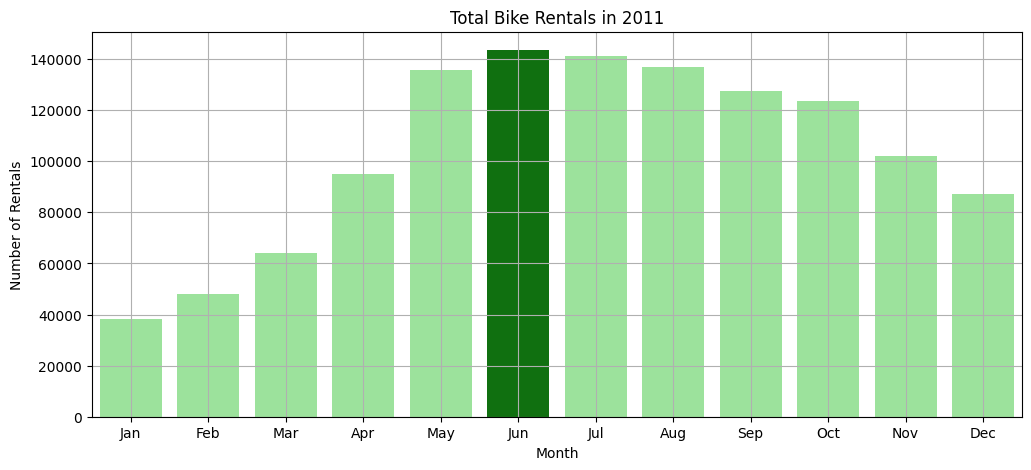

The month with the highest number of bike rentals in 2011 is: Jun


In [54]:
bike_2011 = bike_day_df[bike_day_df["yr"] == 0]  # 0 = 2011, 1 = 2012

month_trend = bike_2011.groupby("mnth")["cnt"].sum()
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
month_trend.index = month_trend.index.map(month_labels)

max_month = month_trend.idxmax()

colors = ["green" if month == max_month else "lightgreen" for month in month_trend.index]

plt.figure(figsize=(12, 5))
sns.barplot(x=month_trend.index, y=month_trend.values, palette=colors)

plt.title("Total Bike Rentals in 2011")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

print(f"The month with the highest number of bike rentals in 2011 is: {max_month}")

Berdasarkan hasil visualisasi data diatas, diperoleh bahwasanya bulan dengan tingkat penyewaan tertinggi pada tahun 2011 adalah bulan juni

### Pertanyaan 2: Pada bulan apa penyewaan sepeda terendah di tahun 2012?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32684\395656253.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_trend.index, y=month_trend.values, palette=colors)


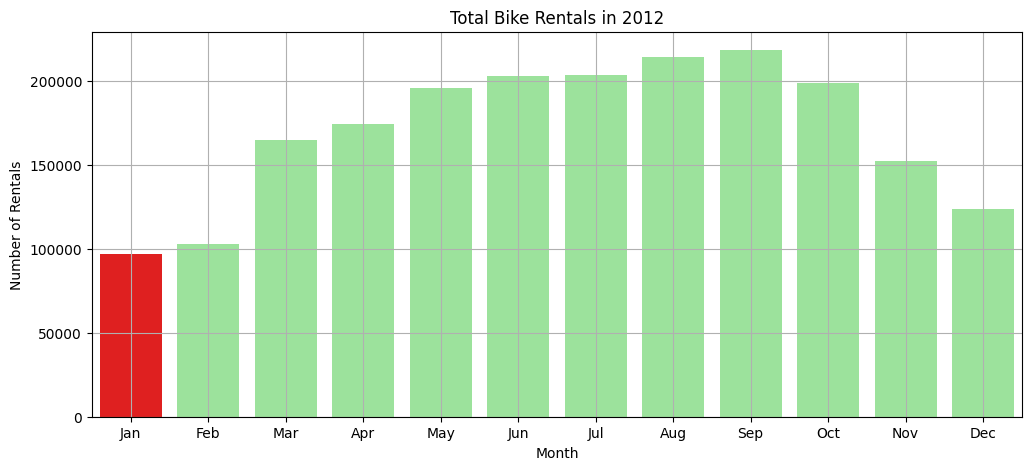

The month with the lowest number of bike rentals in 2012 is: Jan


In [52]:
bike_2012 = bike_day_df[bike_day_df["yr"] == 1]  # 1 = 2012

month_trend = bike_2012.groupby("mnth")["cnt"].sum()
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
month_trend.index = month_trend.index.map(month_labels)

min_month = month_trend.idxmin()

colors = ["red" if month == min_month else "lightgreen" for month in month_trend.index]

plt.figure(figsize=(12, 5))
sns.barplot(x=month_trend.index, y=month_trend.values, palette=colors)

plt.title("Total Bike Rentals in 2012")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

print(f"The month with the lowest number of bike rentals in 2012 is: {min_month}")


Berdasarkan hasil visualisasi data diatas, diperoleh bahwasanya bulan dengan tingkat penyewaan terendah pada tahun 2012 adalah bulan januari

### Pertanyaan 3 : Seberapa berpengaruh cuaca dalam kuantitas penyewaan sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32684\1082742902.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=sum_rentals_by_season, palette=colors)


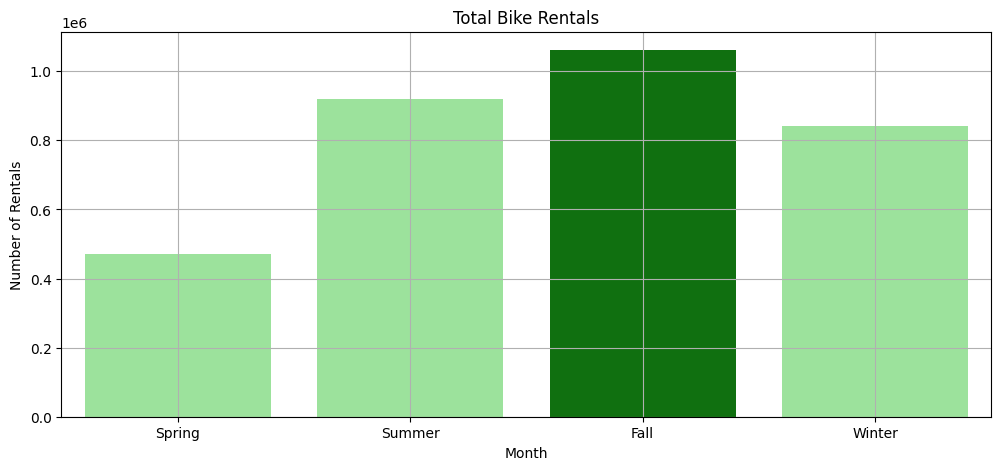

In [56]:
sum_rentals_by_season = bike_day_df.groupby('season')['cnt'].sum().reset_index()

season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
sum_rentals_by_season["season"] = sum_rentals_by_season["season"].map(season_labels)

max_season = sum_rentals_by_season.loc[sum_rentals_by_season["cnt"].idxmax(), "season"]

colors = ["green" if season == max_season else "lightgreen" for season in sum_rentals_by_season["season"]]

plt.figure(figsize=(12, 5))
sns.barplot(x="season", y="cnt", data=sum_rentals_by_season, palette=colors)

plt.title("Total Bike Rentals")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.grid(True)
plt.show()

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa musim memiliki dampak terhadap tingkat penyewaan sepeda. Jumlah penyewaan tampak bervariasi di setiap musim, dengan musim gugur mencatat angka penyewaan tertinggi dibandingkan musim lainnya. Kemungkinan besar, hal ini disebabkan oleh cuaca yang lebih bersahabat dan mendukung aktivitas bersepeda, sehingga mendorong lebih banyak orang untuk menyewa sepeda selama musim tersebut.

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan hasil visualisasi data diatas, diperoleh bahwasanya bulan dengan tingkat penyewaan tertinggi pada tahun 2011 adalah bulan juni
- Conclution pertanyaan 2 : Berdasarkan hasil visualisasi data diatas, diperoleh bahwasanya bulan dengan tingkat penyewaan terendah pada tahun 2012 adalah bulan januari
- Conclution pertanyaan 3 : Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa musim memiliki dampak terhadap tingkat penyewaan sepeda. Jumlah penyewaan tampak bervariasi di setiap musim, dengan musim gugur mencatat angka penyewaan tertinggi dibandingkan musim lainnya. Kemungkinan besar, hal ini disebabkan oleh cuaca yang lebih bersahabat dan mendukung aktivitas bersepeda, sehingga mendorong lebih banyak orang untuk menyewa sepeda selama musim tersebut.

In [57]:
bike_day_df.to_csv("main_data.csv", index=False)